## 建立資料庫

In [ ]:
import sqlite3

# Connect to the database, create a new one if it does not exist
conn = sqlite3.connect('sensor_data.db')
cursor = conn.cursor()

# Create a table to store data from MQ6, MQ7, MQ8, MQ135 sensors and GPS coordinates
cursor.execute('''
CREATE TABLE IF NOT EXISTS SensorData (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP,
    mq6_value REAL,
    mq7_value REAL,
    mq8_value REAL,
    mq135_value REAL,
    temperature REAL,
    humidity  REAL,
    gps_x REAL,
    gps_y REAL
)
''')

conn.commit()
conn.close()

## 插入資料到資料庫

In [ ]:
import sqlite3
import random
import time

# 連接到資料庫
conn = sqlite3.connect('sensor_data.db')
cursor = conn.cursor()

# 生成50筆模擬數據並插入資料庫
for _ in range(50):
    mq6_value = random.randint(50, 700)  # 模擬LPG濃度
    mq7_value = random.randint(30, 600)  # 模擬CO濃度
    mq8_value = random.randint(20, 500)  # 模擬氫氣濃度
    mq135_value = random.randint(10, 600)  # 模擬空氣質量中的有害氣體
    temperature = round(random.uniform(15.0, 35.0), 2)  # 溫度範圍：15°C - 35°C
    humidity = round(random.uniform(30.0, 90.0), 2)  # 濕度範圍：30% - 90%
    gps_x = round(random.uniform(120.0000, 120.1000), 6)  # 模擬GPS X座標
    gps_y = round(random.uniform(23.0000, 23.1000), 6)  # 模擬GPS Y座標

    # 插入數據到資料庫
    cursor.execute('''
    INSERT INTO SensorData (mq6_value, mq7_value, mq8_value, mq135_value, temperature, humidity, gps_x, gps_y)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', (mq6_value, mq7_value, mq8_value, mq135_value, temperature, humidity, gps_x, gps_y))
    time.sleep(1)  # 每次迴圈間隔 1 秒

# 提交更改並關閉資料庫連接
conn.commit()
conn.close()

print("50筆模擬數據已成功插入資料庫")

## 清空資料表

In [ ]:
import sqlite3

# 連接到資料庫
conn = sqlite3.connect('sensor_data.db')
cursor = conn.cursor()

# 清除SensorData表中的所有數據
cursor.execute('DELETE FROM SensorData')

# 提交更改並關閉資料庫連接
conn.commit()
conn.close()

print("所有資料已清除")

## 查看所有資料

In [1]:
import sqlite3
import pandas as pd

# 連接到SQLite資料庫
conn = sqlite3.connect('sensor_data.db')

# 從資料庫中匯入數據
query = "SELECT mq6_value, mq7_value, mq8_value, mq135_value, temperature, humidity FROM SensorData"
data = pd.read_sql_query(query, conn)

conn.close()

data

,mq6_value,mq7_value,mq8_value,mq135_value,temperature,humidity
0,685.0,143.0,198.0,16.0,29.63,87.34
1,284.0,251.0,254.0,363.0,29.40,55.53
2,451.0,354.0,175.0,466.0,33.20,56.84
3,488.0,191.0,59.0,493.0,32.84,71.69
4,568.0,406.0,406.0,132.0,15.80,55.11
5,470.0,597.0,54.0,589.0,16.34,50.89
6,341.0,306.0,122.0,191.0,33.23,45.43
7,462.0,355.0,29.0,155.0,29.32,68.10
8,462.0,483.0,452.0,17.0,20.55,74.61
9,236.0,168.0,114.0,316.0,34.08,59.17


## 對所有資料異常偵測

In [2]:
from sklearn.ensemble import IsolationForest

# 建立IsolationForest模型
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# 訓練模型
model.fit(data)

# 預測異常 (-1表示異常, 1表示正常)
predictions = model.predict(data)

# 將結果加入到原始數據中
data['anomaly'] = predictions

# 顯示帶有異常標註的數據
data[:30]

,mq6_value,mq7_value,mq8_value,mq135_value,temperature,humidity,anomaly
0,685.0,143.0,198.0,16.0,29.63,87.34,1
1,284.0,251.0,254.0,363.0,29.40,55.53,1
2,451.0,354.0,175.0,466.0,33.20,56.84,1
3,488.0,191.0,59.0,493.0,32.84,71.69,1
4,568.0,406.0,406.0,132.0,15.80,55.11,1
5,470.0,597.0,54.0,589.0,16.34,50.89,-1
6,341.0,306.0,122.0,191.0,33.23,45.43,1
7,462.0,355.0,29.0,155.0,29.32,68.10,1
8,462.0,483.0,452.0,17.0,20.55,74.61,1
9,236.0,168.0,114.0,316.0,34.08,59.17,1


## 對溫度異常偵測

In [4]:
import sqlite3
import pandas as pd
from sklearn.ensemble import IsolationForest

# 連接到SQLite資料庫
conn = sqlite3.connect('sensor_data.db')

# 只匯入temperature欄位
query = "SELECT temperature FROM SensorData"
data = pd.read_sql_query(query, conn)

conn.close()

# 確保數據格式符合模型的需求 (需要轉換成2D array)
temperature_data = data[['temperature']]

# 建立IsolationForest模型
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# 訓練模型
model.fit(temperature_data)

# 預測異常 (-1表示異常, 1表示正常)
predictions = model.predict(temperature_data)

# 將結果加入到原始數據中
data['anomaly'] = predictions

# 顯示帶有異常標註的數據
print(data[:5])

   temperature  anomaly
0        29.63        1
1        29.40        1
2        33.20        1
3        32.84        1
4        15.80        1


## 溫度偵測--視覺化

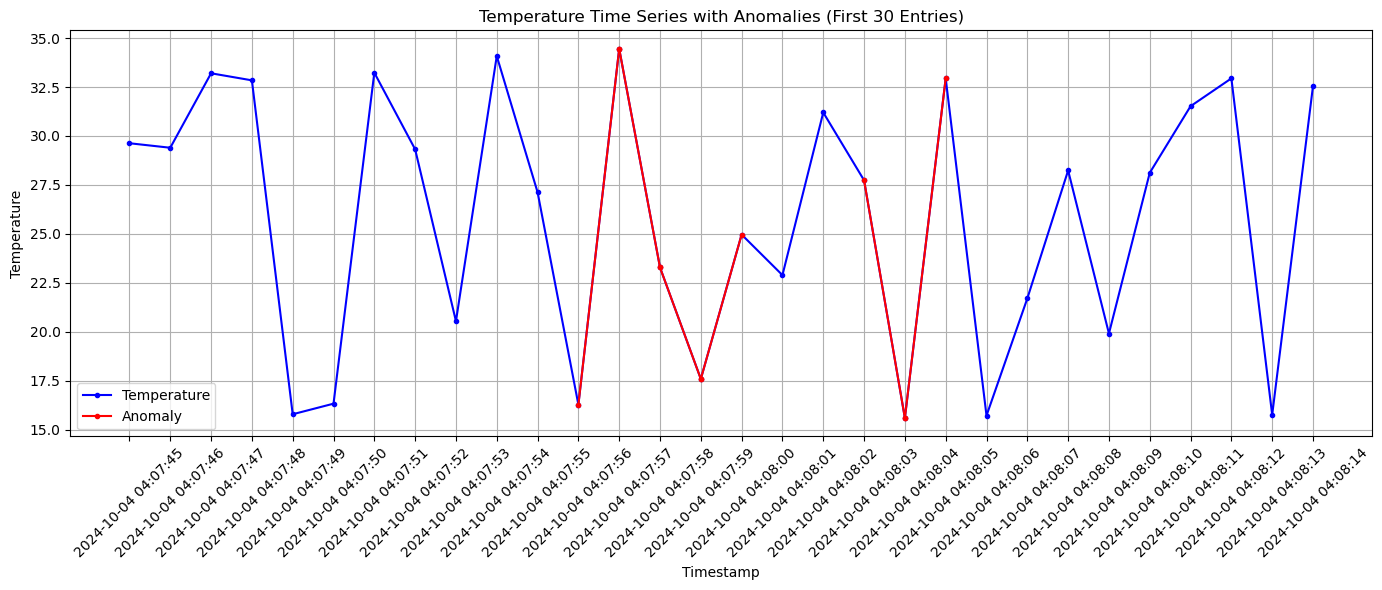

In [5]:
import sqlite3
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# 連接到SQLite資料庫
conn = sqlite3.connect('sensor_data.db')

# 匯入temperature和timestamp欄位，只取前30筆數據
query = "SELECT timestamp, temperature FROM SensorData LIMIT 30"
data = pd.read_sql_query(query, conn)

conn.close()

# 確保數據格式符合模型的需求 (需要轉換成2D array)
temperature_data = data[['temperature']]

# 建立IsolationForest模型
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# 訓練模型
model.fit(temperature_data)

# 預測異常 (-1表示異常, 1表示正常)
predictions = model.predict(temperature_data)

# 將結果加入到原始數據中
data['anomaly'] = predictions

# 2D 時間序列圖
plt.figure(figsize=(14, 6))

# 繪製所有數據的藍色連線 (包含正常和異常)
plt.plot(data['timestamp'], data['temperature'], 'b.-', label='Temperature')

# 繪製異常點之間的紅色連線
for i in range(len(data) - 1):
    if data['anomaly'].iloc[i] == -1 or data['anomaly'].iloc[i + 1] == -1:
        plt.plot(data['timestamp'].iloc[i:i + 2], data['temperature'].iloc[i:i + 2], 'r.-')

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Time Series with Anomalies (First 30 Entries)')
plt.xticks(rotation=45)
plt.legend(['Temperature', 'Anomaly'], loc='best')
plt.grid()
plt.tight_layout()
plt.show()